# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting.

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports**


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [ ]:
# Import libraries and packages.

### YOUR CODE HERE ###
# Import data and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# stats libraries
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as sf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ###
print(data.head())

print(data.info())

print(data.describe())



       TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB
None
            Radio  Social Media       Sales
count  571.000000    572.000000  571.000000
mean    18.646472      3.248471  193.516937
std      9.650740      2.195696   90.516153
min      0.19

The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

To better understand the range and spread of the data. It can show whether any of the variables have linear relationships with the target variable. It also gives you information about missing data or potentially bad data.

## **Step 2: Data exploration**


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

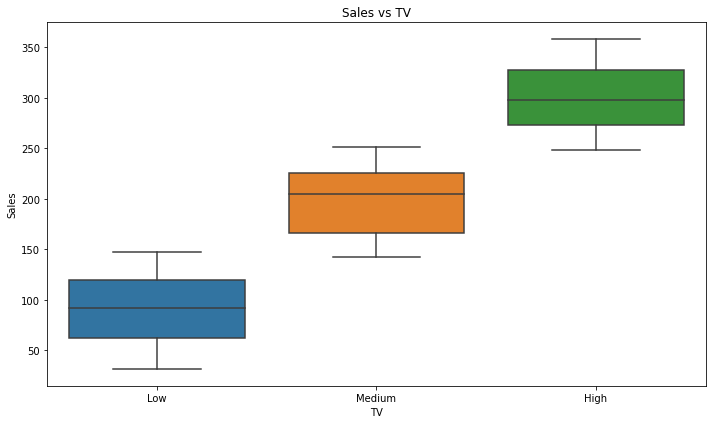

In [ ]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.boxplot(x='TV', y='Sales', data=data)
plt.title('Sales vs TV')
plt.tight_layout()
plt.show()

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

Yes. The greater the promotion budget, the greater the sales.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

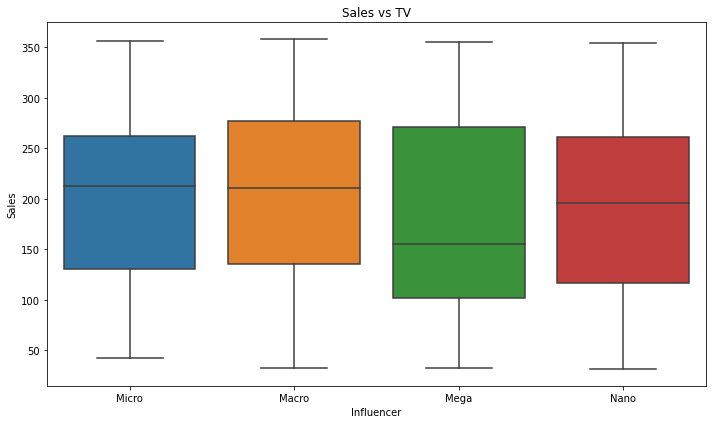

In [ ]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.boxplot(x='Influencer', y='Sales', data=data)
plt.title('Sales vs TV')
plt.tight_layout()
plt.show()


**Question:** Is there variation in `Sales` based off the `Influencer` size?

There does NOT appear to be a large variation in means of Sales based on the size of the Influencer. In fact, the largest Influencer (Mega) has a lower mean Sales than the smallest (Nano).

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [ ]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ###
print(data.shape)

# see if the data has any missing values
print("Missing values:")
print(data.isna().sum())

ols_data = data.dropna()

# Confirm the data contains no missing values.

### YOUR CODE HERE ###
print(ols_data.shape)

print("Missing values:")
print(ols_data.isna().sum())


(572, 5)
Missing values:
TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64
(569, 5)
Missing values:
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


## **Step 3: Model building**


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [ ]:
# Define the OLS formula.
ols_formula = "Sales ~ C(TV)"

# Create an OLS model.
OLS = sf.ols(formula = ols_formula, data = ols_data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
summary = model.summary()

# Display the model results.
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          8.81e-256
Time:                        16:14:27   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** Which categorical variable did you choose for the model? Why?

I chose to build the model using the TV variable since it had a clear relationship to Sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Yes, linearity is met based on the coefficients for T.Low, T.Medium and associated p-values.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

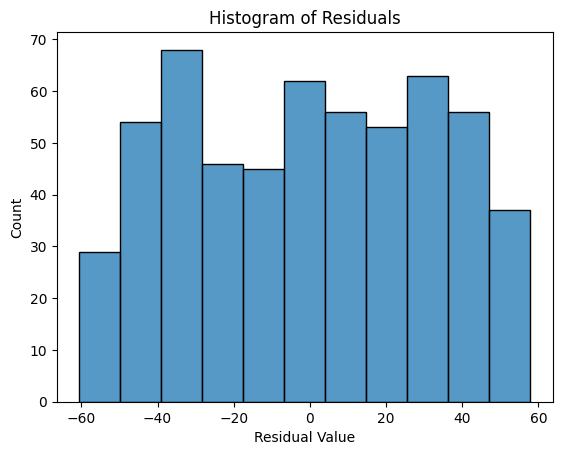

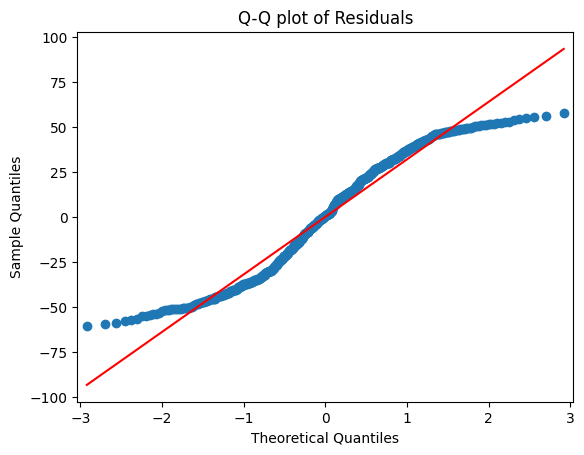

In [ ]:
# Calculate the residuals.

### YOUR CODE HERE ###
residuals = model.resid

# Create a histogram with the residuals.

### YOUR CODE HERE ###
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

# Create a QQ plot of the residuals.

### YOUR CODE HERE ###
fig = sm.qqplot(residuals, line = 's')
plt.title("Q-Q plot of Residuals")
plt.show()


**Question:** Is the normality assumption met?

The S-curve on the QQ plot does not fit very well, but could also be interpreted as a good enough fit for linearity.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

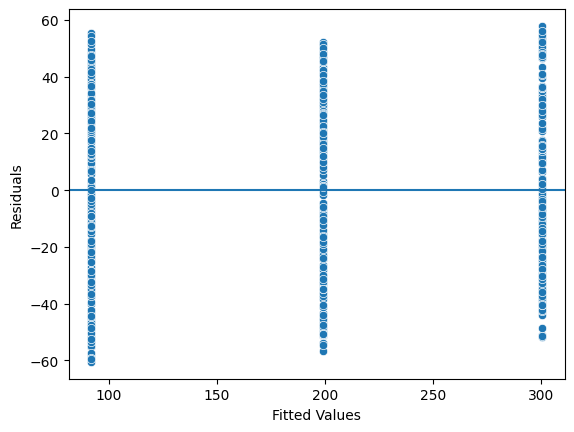

In [ ]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ###
fitted_values = model.predict(data[['TV']])
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

### YOUR CODE HERE ###
# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
# Show the plot
plt.show()


**Question:** Is the constant variance (homoscedasticity) assumption met?

Yes, the distribution of errors looks unformly distributed.

## **Step 4: Results and evaluation**

First, display the OLS regression results.

In [ ]:
# Display the model results summary.
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          8.81e-256
Time:                        16:56:38   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

The r-squared means at 87% of Sales value can be predicted by the TV budget.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The coefficient estimates are statistically significant since the p-values are <0.5. The negative correlation of Low, and less negatvie correlation of Medium support the idea that the greater the TV budget, the higher the sales.

**Question:** Do you think your model could be improved? Why or why not? How?

Yes. If the categorical data for TV could be replaced with the continuous values, the model might make more accurate predictions. Adding more variables to the model might also imrpove performance.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups.

In [ ]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ###
print(sm.stats.anova_lm(model, typ = 1))
# Run one-way ANOVA
print(sm.stats.anova_lm(model, typ = 2))
# Run one-way ANOVA
print(sm.stats.anova_lm(model, typ = 3))


             df        sum_sq       mean_sq            F         PR(>F)
C(TV)       2.0  4.052692e+06  2.026346e+06  1971.455737  8.805550e-256
Residual  566.0  5.817589e+05  1.027843e+03          NaN            NaN
                sum_sq     df            F         PR(>F)
C(TV)     4.052692e+06    2.0  1971.455737  8.805550e-256
Residual  5.817589e+05  566.0          NaN            NaN
                 sum_sq     df             F         PR(>F)
Intercept  1.589597e+07    1.0  15465.378887   0.000000e+00
C(TV)      4.052692e+06    2.0   1971.455737  8.805550e-256
Residual   5.817589e+05  566.0           NaN            NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

The null hypothesis is that TV budget does not affect Sales.
The alternative hypothesis is that TV budget does affect Sales.

**Question:** What is your conclusion from the one-way ANOVA test?

The p-value is 8.81e-256, an extraordinarily small value (essentially 0). This indicates that the observed differences in Sales across the levels of C(TV) are statistically significant. Since the p-value is very low, reject the null hypothesis.

**Question:** What did the ANOVA test tell you?

That Sales are strongly correlated with TV budget.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [ ]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ###
tukey = pairwise_tukeyhsd(ols_data['Sales'], ols_data['TV'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
  High    Low -208.8133 0.001  -216.637 -200.9896   True
  High Medium -101.5061 0.001 -109.3204  -93.6918   True
   Low Medium  107.3072 0.001   99.7063   114.908   True
--------------------------------------------------------


**Question:** What is your interpretation of the Tukey HSD test?

All pairs of means values in the TV group (Low, Medium, High) are statistically significant.  With very low adjusted p-values, the null hypothesis can be rejected.

**Question:** What did the post hoc tell you?**

That TV budget strongly predicts Sales.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

How to run ANOVA tests and tukeyhsd tests.
Reinforcement learning on how to run linear regressions and test the assumptions of a regression.


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

The TV budget has a strong statistical correlation with Sales. The higher the budget, the higher the Sales. With actual TV budget numbers, the model can be improved to make better predictions.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)